In [2]:
import random
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from parameters import *

In [3]:
stations_N

20

In [3]:
df = pd.DataFrame(columns=['start', 'end', 'time'])

data = np.arange(stations_N)

# 生成符合正态分布的随机数作为索引
end=list(np.random.normal(4, 1, 22000).astype(int))
start=list(np.random.normal(12, 1, 22000).astype(int))

# start_uni=list(np.random.uniform(0, stations_N, 8000).astype(int))
# end_uni=list(np.random.uniform(0, stations_N, 8000).astype(int))

# start=start+start_uni
# end=end+end_uni

# 确保索引在合法范围内
start = np.clip(start, 0, len(data)-1)
end=np.clip(end, 0, len(data)-1)
time=list(np.random.uniform(0, 240,22000).astype(int))

df['start'] = start
df['end'] = end
df['time'] = time
df['id']=df.index

In [4]:
df['forward'] = df.apply(lambda row: 1 if row['start'] < row['end'] else 0, axis=1)
df=df[df['start']!=df['end']]
df

,start,end,time,id,forward
0,13,4,204,0,0
1,13,2,92,1,0
2,11,3,217,2,0
3,12,3,217,3,0
4,12,3,107,4,0
...,...,...,...,...,...
21995,12,4,122,21995,0
21996,12,4,95,21996,0
21997,10,4,148,21997,0
21998,11,4,78,21998,0


In [5]:
df['start_']=df.apply(lambda row: row['start'] if row['forward']==1 else stations_N*2-1-row['start'], axis=1)
df['end_']=df.apply(lambda row: row['end'] if row['forward']==1 else stations_N*2-1-row['end'], axis=1)

In [6]:
df['forward'].value_counts()

0    22000
Name: forward, dtype: int64

In [7]:
df.to_csv('../data/simulated_data.csv', index=False)

In [17]:
df = pd.DataFrame(columns=['start', 'end', 'time'])

data = np.arange(stations_N)

# 生成符合正态分布的随机数作为索引
# start=list(np.random.normal(4, 3, 20000).astype(int))
# end=list(np.random.normal(12, 0.01, 20000).astype(int))

start_uni=list(np.random.uniform(0, stations_N, 20000).astype(int))
end_uni=list(np.random.uniform(0, stations_N, 20000).astype(int))

# start=start+start_uni
# end=end+end_uni

# 确保索引在合法范围内
start = np.clip(start_uni, 0, len(data)-1)
end=np.clip(end_uni, 0, len(data)-1)
time=list(np.random.uniform(0, 240,20000).astype(int))

df['start'] = start
df['end'] = end
df['time'] = time
df['id']=df.index

df['forward'] = df.apply(lambda row: 1 if row['start'] < row['end'] else 0, axis=1)
df=df[df['start']!=df['end']]

df['start_']=df.apply(lambda row: row['start'] if row['forward']==1 else stations_N*2-1-row['start'], axis=1)
df['end_']=df.apply(lambda row: row['end'] if row['forward']==1 else stations_N*2-1-row['end'], axis=1)

In [18]:
df['end_'].value_counts()

39    989
19    916
18    891
17    875
38    865
37    838
16    812
36    800
15    770
35    713
13    703
14    685
33    672
34    664
12    632
32    616
31    594
11    536
10    492
30    484
29    473
9     434
28    399
27    378
8     362
7     350
6     289
26    280
5     268
25    262
24    203
4     177
3     153
23    143
2     117
22    107
1      56
21     45
Name: end_, dtype: int64

In [19]:
df[df['end_']==15]['forward'].sum(), df[df['end_']==15].shape[0]

(770, 770)

In [20]:
df.to_csv('../data/simulated_data(uniform).csv', index=False)

<Axes: >

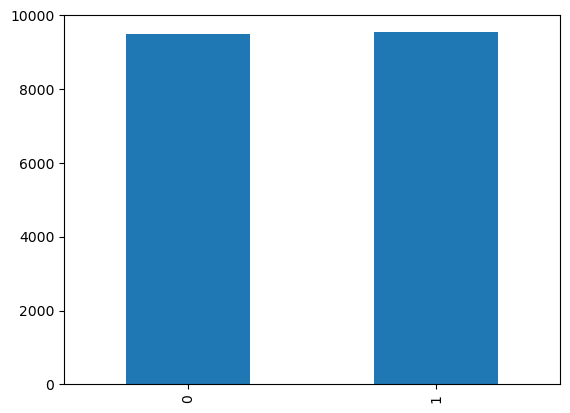

In [6]:
df['forward'].value_counts().sort_index().plot(kind='bar')